## Praca domowa 4

#### Autor: Damian Skowroński

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [28]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a)

In [29]:
df[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)][["Name"]]

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


Odpowiedź: 
Mario & Sonic at the Rio 2016 Olympic Games, Mario & Sonic at the Rio 2016 Olympic Games, Teddy Together	

#### b)

In [30]:
df[df.Year == 2010].groupby("Genre").Global_Sales.agg("sum").sort_values(ascending = False).head(1)

Genre
Action    117.64
Name: Global_Sales, dtype: float64

Odpowiedź: Najwięcej zarobiły gry akcji.

#### c)

In [31]:
zc = df.groupby("Genre")[["EU_Sales","JP_Sales"]].mean().reset_index()
wynik = zc[zc.EU_Sales < zc.JP_Sales].sort_values(by = ["JP_Sales"], ascending = False).reset_index(drop = True).iloc[:,[0,2]]
wynik.columns = ["Typ Gry","Średnia sprzedaż w Japonii"]
wynik

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

#### Oryginalny wykres
Wykres znajduje się na stronie https://www.economist.com/graphic-detail/2021/10/12/the-imf-warns-that-the-global-economic-recovery-will-be-grossly-uneven i wygląda następująco:

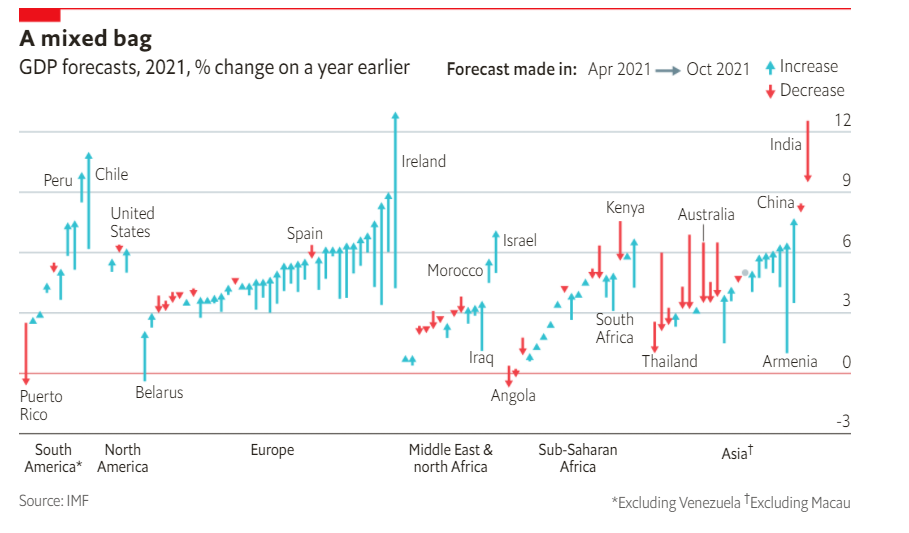

#### Poprawiony wykres w R
Wykonany przez mnie wykres w pracy domowej 2 wygląda tak:

https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SkowronskiDamian/Skowronski_Damian_hw2.html

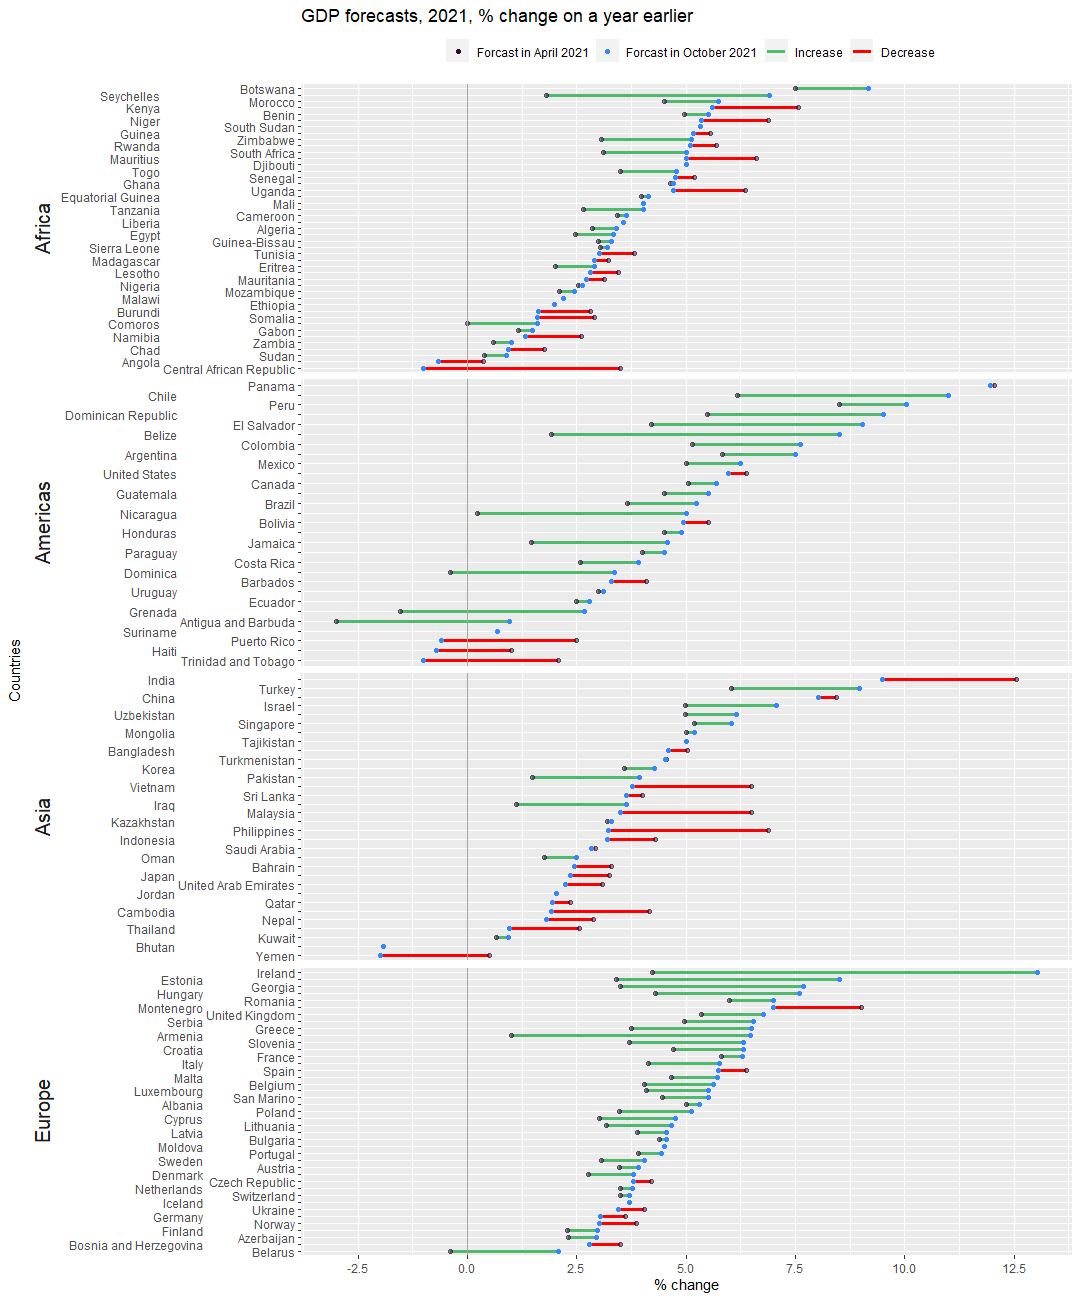

W wizualizacji połączyłem ze sobą Amerykę Płudniową i Północną, a na dodatek nie wziąłem pod uwagę Oceanii. W nowym wykresie nie zastosuję takich ułatwień i zawiorę wszystkie państwa z których mam dane, a także poprawię estetykę.

#### Wykres w pythonie
Wczytanie bibliotek i danych

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
kraje = pd.read_csv("krajeKontyn2.csv")
df_apr = pd.read_csv("WEO_Dataapr.xls.csv",usecols = ["Country","2021"]).rename(columns = {"2021":"apr"})
df_oct = pd.read_csv("WEO_Dataoct.xls.csv",usecols = ["Country","2021"]).rename(columns = {"2021":"oct"})


Przygotowanie ramki danych

In [33]:
df = df_apr.merge(df_oct, on = "Country", how = "left" ).merge(kraje, on = "Country").dropna().reset_index(drop = True)
df = df[(df.oct<15) & (df.apr>-5)]
df = df.groupby("Continent").apply(lambda _df: _df.sort_values(by=['oct'],ascending = False))
df = df.iloc[::-1].reset_index(drop = True)
df["plus_change"] = np.where(df['apr'] < df["oct"], True, False)  
df["range"] = range(1,len(df.index)+1) #przydzielenie odpowiedniego miejsca

dft = df[df.plus_change == True] #hlines red
dff =  df[df.plus_change == False] #hlines green

df["Country"] = df["Country"].astype("category") 
df["smaller"] = np.where(df['apr'] < df["oct"], df["apr"], df["oct"]) #miejsce podpisu

Stworzenie wykresu

In [34]:
#wykorzystane kolory, wygodniej tak
WHITE = "#FFFCFC" 
GREY = "#f0f0f0"
YELLOW = "#daa520"
BLUE = "#4169e1" 
RED = "#ff0800"
GREEN = "#03c03c"
BLACK = "#004040"

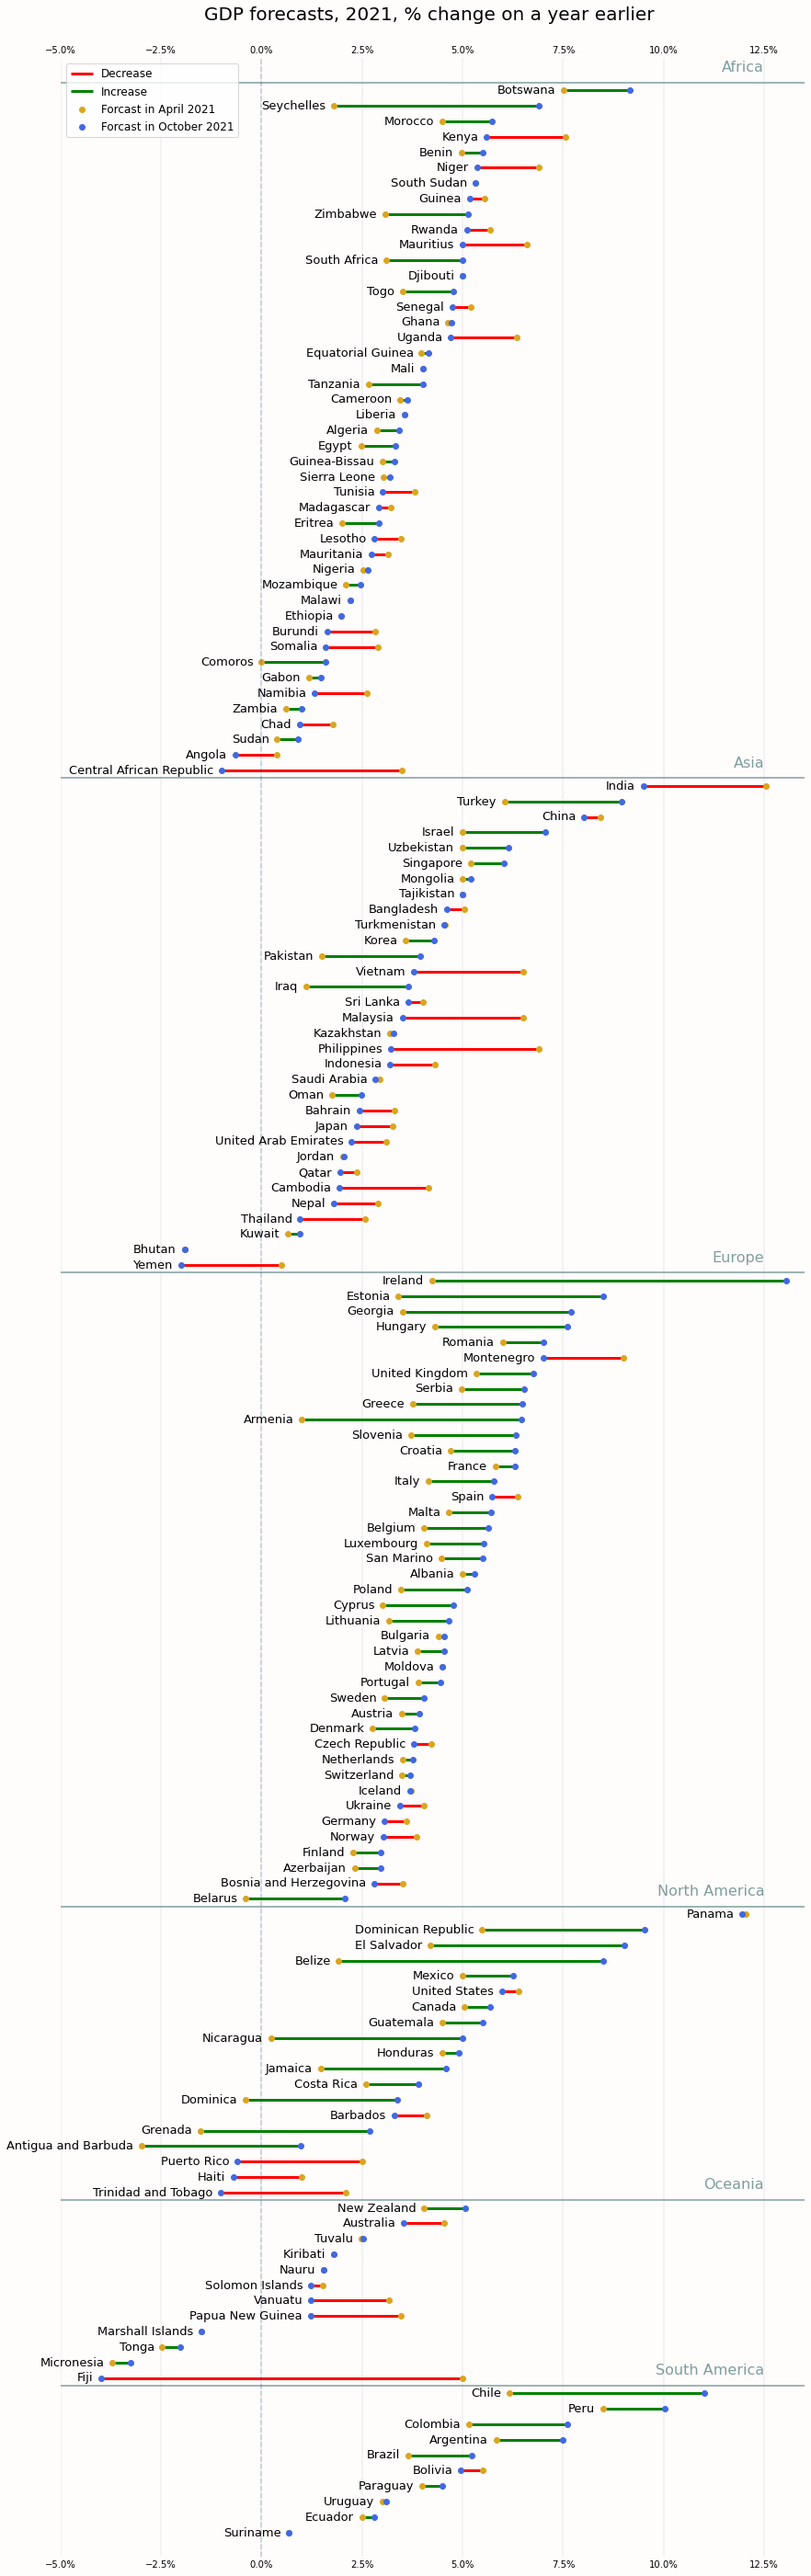

In [35]:
fig, ax = plt.subplots(figsize = (14.5,50))
ax.hlines(y=dff["range"], xmin=dff['apr'], xmax=dff['oct'], 
       color= 'red',
       label = "Decrease",
         lw = 3)
ax.hlines(y=dft["range"], xmin=dft['apr'], xmax=dft['oct'], 
          color= 'green',
          label = "Increase",
          lw = 3)
ax.scatter(df['apr'], df["range"], color=YELLOW, label='Forcast in April 2021', alpha = 1,zorder=2)
ax.scatter(df['oct'], df["range"], color=BLUE , label='Forcast in October 2021', alpha = 1,zorder=2)
ax.axvline(x = 0, alpha = 0.3, linestyle = "--")


#oś x
xticks = np.linspace(-5, 15, num=9, dtype=float).tolist()

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True, length=0)
ax.set_xticks(xticks)
ax.set_xlim([-5,13.5])
for xtick in xticks: #pionowe linie
    ax.axvline(xtick, color=GREY, zorder=0)

#oś y
ax.set_yticks(df["range"])
ax.yaxis.set_visible(False)



#linie oddzielające kontynenty i napisy na nich
for i in [10.5,22.5,41.5,82.5, 114.5,159.5]:
    ax.axhline( y =i,alpha = 0.5, color = BLACK) 

ax.text(12.5,160.5,"Africa",ha="right",va="center",size=16,color=BLACK,alpha = 0.5) 
ax.text(12.5,115.5,"Asia",ha="right",va="center",size=16,color=BLACK,alpha = 0.5)
ax.text(12.5,83.5,"Europe",ha="right",va="center",size=16,color=BLACK,alpha = 0.5)
ax.text(12.5,42.5,"North America",ha="right",va="center",size=16,color=BLACK,alpha = 0.5)
ax.text(12.5,23.5,"Oceania",ha="right",va="center",size=16,color=BLACK,alpha = 0.5)
ax.text(12.5,11.5,"South America",ha="right",va="center",size=16,color=BLACK,alpha = 0.5)

ax.legend(loc = "upper left",prop={'size': 12})

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.margins( y=0.01) #żeby nie było przerwy na górze i dole

    
for row in range(df.shape[0]): #podpisy obok 
    ax.text(df["smaller"][row] - 0.2, df["range"][row], df["Country"][row], 
            ha="right", va="center",size=13,color="black") 

ax.set_title("GDP forecasts, 2021, % change on a year earlier \n",size = 20)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(100)) # % na osi x

ax.set_facecolor(WHITE)
fig.patch.set_facecolor(WHITE)
#fig.show()

#### Uzasadnienie
Nowy wykres, podobnie jak wykres stworzony w R, rozwiązuje problemy z oryginalnego wykresu, którymi są:

    1.Problem z dokładnym odczytaniem, gdzie zaczynają się i kończą strzałki.
    2.Podpisanie tylko niektórych strzałek, z nieokreślonym powodem.
    3.Niekiedy niepewność w odczytaniu, który podpis należy do której strzałki.
    4.Niekoniecznie celna przynależność państw do kontynentów (Puerto Rico w Południowej Ameryce, Australia w Azji).

Wykres stworzony w pythonie jest czytelniejszy od tego stworzonego w R, dlatego że jest czystszy, to znaczy jest mniej elementów, ale nie wpływa to na przekazywaną treść. Łatwiej jest odczytać nazwy państw, którym odpowiadają poszczególne linie, ponieważ są zaraz obok nich, gdzie w porzednio zrobionym przeze mnie wykresie należało podążać za liniami siatki i do tego były dwie kolumny podpisów. Poziome linie tym razem są wszystkie w takiej samej odległości od siebie, w przeciwieństwie do poprzedniego wykresu, gdzie na kontynentach na których było więcej państw były ściśnięte. Na nowym wykresie pojawiły się także procenty na osi x.
